# **Redes Neurais e Inteligência Artificial em R**

**prof: Sergio Assuncao Monteiro, DSc**

linkedin: https://www.linkedin.com/in/sergio-assun%C3%A7%C3%A3o-monteiro-b781897b/

lattes: http://lattes.cnpq.br/9489191035734025

Passo 1: Selecionar ambiente de execução: No menu superior, clique em "Ambiente de execução" (Runtime) e selecione "Mudar tipo de ambiente de execução" (Change runtime type).

Passo 2: Escolher configurações: Selecione "R" no campo "Tipo de ambiente de execução" (Runtime type). Isso vai configurar o ambiente para executar código R.

# **Aula 02 - Redes Neurais Artificiais**

In [ ]:
# Instale a biblioteca neuralnet se ainda não estiver instalada
install.packages("neuralnet")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘Deriv’




In [ ]:
library(neuralnet)

# Dados fictícios de treinamento
set.seed(123) # Define a semente para reprodução dos resultados
X_train <- data.frame(Input1 = runif(100, 0, 1), Input2 = runif(100, 0, 1))
y_train <- X_train$Input1 + X_train$Input2 + rnorm(100, mean = 0, sd = 0.1)

# Crie um dataframe que combine os recursos de entrada e o alvo
train_data <- data.frame(X_train, y_train)

# Treine uma rede neural
model <- neuralnet(
  y_train ~ Input1 + Input2,
  data = train_data,
  hidden = c(5, 3), # Camadas ocultas com 5 e 3 neurônios
  linear.output = TRUE # Saída linear para regressão
)

# Visualize a rede neural
plot(model)

# Faça previsões com a rede neural
new_data <- data.frame(Input1 = 0.6, Input2 = 0.4) # Dados de entrada para previsão
predictions <- predict(model, newdata = new_data)
cat('Previsão:', predictions, '\n')


Previsão: 0.996257 


# **Aula 04 - Aplicação de DNN**

In [ ]:
install.packages("mlbench")
install.packages("deepnet")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
# Deep learning in R
# loading the required packages
library(mlbench)
library(deepnet)
data("BreastCancer")

# Clean off rows with missing data
BreastCancer = BreastCancer[which(complete.cases(BreastCancer)
								== TRUE),]
head(BreastCancer)
names(BreastCancer)


,Id,Cl.thickness,Cell.size,Cell.shape,Marg.adhesion,Epith.c.size,Bare.nuclei,Bl.cromatin,Normal.nucleoli,Mitoses,Class
,<chr>,<ord>,<ord>,<ord>,<ord>,<ord>,<fct>,<fct>,<fct>,<fct>,<fct>
1,1000025,5,1,1,1,2,1,3,1,1,benign
2,1002945,5,4,4,5,7,10,3,2,1,benign
3,1015425,3,1,1,1,2,2,3,1,1,benign
4,1016277,6,8,8,1,3,4,3,7,1,benign
5,1017023,4,1,1,3,2,1,3,1,1,benign
6,1017122,8,10,10,8,7,10,9,7,1,malignant


[1] "Id"              "Cl.thickness"    "Cell.size"       "Cell.shape"     
 [5] "Marg.adhesion"   "Epith.c.size"    "Bare.nuclei"     "Bl.cromatin"    
 [9] "Normal.nucleoli" "Mitoses"         "Class"

# **Aula 06 - Aplicações de CNN**

In [ ]:
install.packages("keras")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
# Instale o pacote Keras se ainda não estiver instalado
# install.packages("keras")

library(keras)

# Carregue o conjunto de dados MNIST
mnist <- dataset_mnist()
x_train <- mnist$train$x
y_train <- mnist$train$y
x_test <- mnist$test$x
y_test <- mnist$test$y

# Pré-processamento dos dados
x_train <- array_reshape(x_train, c(nrow(x_train), 28, 28, 1))
x_test <- array_reshape(x_test, c(nrow(x_test), 28, 28, 1))
x_train <- x_train / 255
x_test <- x_test / 255

# Crie uma CNN simples
model <- keras_model_sequential() %>%
  layer_conv_2d(filters = 32, kernel_size = c(3, 3), activation = 'relu', input_shape = c(28, 28, 1)) %>%
  layer_max_pooling_2d(pool_size = c(2, 2)) %>%
  layer_conv_2d(filters = 64, kernel_size = c(3, 3), activation = 'relu') %>%
  layer_max_pooling_2d(pool_size = c(2, 2)) %>%
  layer_flatten() %>%
  layer_dense(units = 128, activation = 'relu') %>%
  layer_dropout(rate = 0.5) %>%
  layer_dense(units = 10, activation = 'softmax')

# Compile o modelo
compile(model, loss = 'sparse_categorical_crossentropy', optimizer = optimizer_adam(), metrics = c('accuracy'))

# Treine o modelo
history <- fit(model, x_train, y_train, epochs = 10, batch_size = 128, validation_split = 0.2)

# Avalie o modelo
evaluate(model, x_test, y_test)


loss   accuracy 
0.02590243 0.99180001

# **Aula 08 - Redes Neurais para Classificação**

In [ ]:
install.packages("neuralnet")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(neuralnet)

# Split data
train_idx <- sample(nrow(iris), 2/3 * nrow(iris))
iris_train <- iris[train_idx, ]
iris_test <- iris[-train_idx, ]

# Binary classification
nn <- neuralnet(Species == "setosa" ~ Petal.Length + Petal.Width, iris_train, linear.output = FALSE)
pred <- predict(nn, iris_test)
table(iris_test$Species == "setosa", pred[, 1] > 0.5)

# Multiclass classification
nn <- neuralnet((Species == "setosa") + (Species == "versicolor") + (Species == "virginica")
                 ~ Petal.Length + Petal.Width, iris_train, linear.output = FALSE)
pred <- predict(nn, iris_test)
table(iris_test$Species, apply(pred, 1, which.max))

       
        FALSE TRUE
  FALSE    36    0
  TRUE      0   14

            
              1  2  3
  setosa     14  0  0
  versicolor  0 19  1
  virginica   0  0 16

# **Aula 10 - Redes Neurais para Regressão**

In [ ]:
# Instale e carregue a biblioteca Keras
install.packages("keras")
library(keras)

# Gerar dados de exemplo para regressão
set.seed(123)
X <- runif(100, 0, 10)
Y <- 2 * X + 3 + rnorm(100, mean = 0, sd = 2)

# Dividir os dados em conjuntos de treinamento e teste (80% treinamento, 20% teste)
indices_treinamento <- sample(1:100, 80)
X_train <- X[indices_treinamento]
Y_train <- Y[indices_treinamento]
X_test <- X[-indices_treinamento]
Y_test <- Y[-indices_treinamento]

# Criar um modelo sequencial
modelo <- keras_model_sequential()

# Adicionar uma camada densa com um neurônio (para regressão)
modelo %>%
  layer_dense(units = 1, input_shape = c(1))

# Compilar o modelo
modelo %>% compile(
  loss = 'mean_squared_error',
  optimizer = optimizer_sgd(lr = 0.01)
)

# Treinar o modelo
historico <- modelo %>% fit(
  x = X_train,
  y = Y_train,
  epochs = 100,  # Número de épocas de treinamento
  batch_size = 32  # Tamanho do lote
)

# Avaliar o modelo nos dados de teste
resultado <- modelo %>% evaluate(X_test, Y_test)
cat("Erro Quadrático Médio nos Dados de Teste:", resultado, "\n")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Erro Quadrático Médio nos Dados de Teste: 3.127043 


# **Aula 12 - Aplicações de Deep Dream**

In [ ]:
library(tensorflow)
library(keras)

base_image_path <- get_file("sky.jpg", "https://i.imgur.com/aGBdQyK.jpg")
result_prefix <- "sky_dream"

# These are the names of the layers
# for which we try to maximize activation,
# as well as their weight in the final loss
# we try to maximize.
# You can tweak these setting to obtain new visual effects.
layer_settings <- list(
  "mixed4" = 1.0,
  "mixed5" = 1.5,
  "mixed6" = 2.0,
  "mixed7" = 2.5
)

# Playing with these hyperparameters will also allow you to achieve new effects

step <- 0.01  # Gradient ascent step size
num_octave <- 3  # Number of scales at which to run gradient ascent
octave_scale <- 1.4  # Size ratio between scales
iterations <- 20  # Number of ascent steps per scale
max_loss <- 15.0

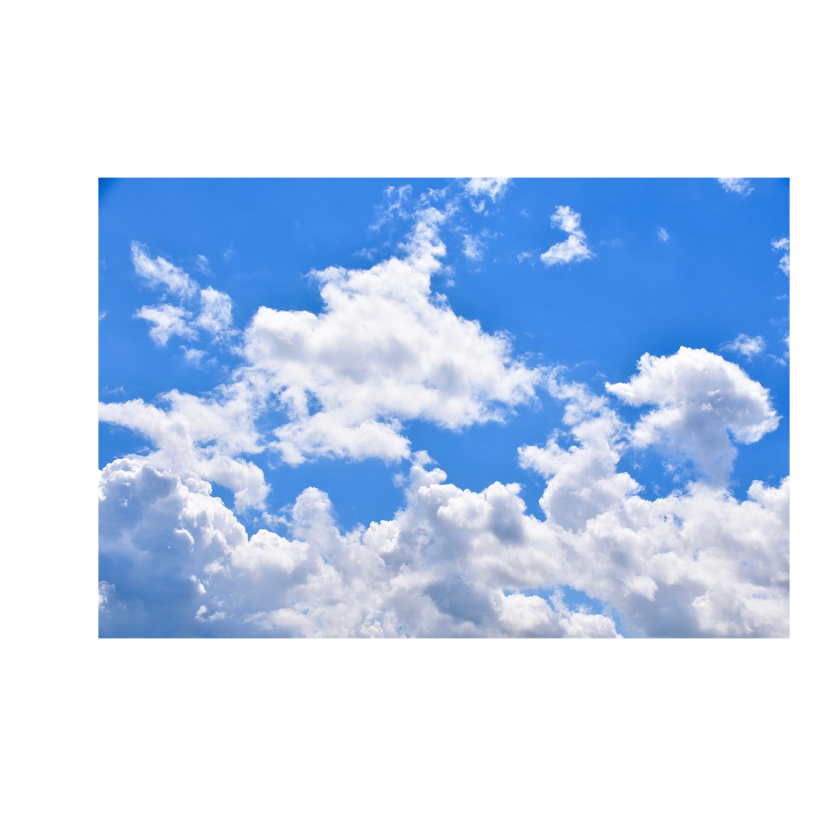

In [ ]:
plot_image <- function(img) {
  img %>%
    as.raster(max = 255) %>%
    plot()
}

base_image_path %>%
  image_load() %>%
  image_to_array() %>%
  plot_image()

In [ ]:
preprocess_image <- function(image_path) {
  # Util function to open, resize and format pictures
  # into appropriate arrays.
  img <- image_path %>%
    image_load() %>%
    image_to_array()
  dim(img) <- c(1, dim(img))
  inception_v3_preprocess_input(img)
}

deprocess_image <- function(x) {
  dim(x) <- dim(x)[-1]
  # Undo inception v3 preprocessing
  x <- x/2.0
  x <- x + 0.5
  x <- x*255.0
  x[] <- raster::clamp(as.numeric(x), 0, 255)
  x
}

In [ ]:
# Build an InceptionV3 model loaded with pre-trained ImageNet weights
model <- application_inception_v3(weights = "imagenet", include_top = FALSE)

# Get the symbolic outputs of each "key" layer (we gave them unique names).
outputs_dict <- purrr::imap(layer_settings, function(v, name) {
  layer <- get_layer(model, name)
  layer$output
})

# Set up a model that returns the activation values for every target layer
# (as a dict)

feature_extractor <- keras_model(inputs = model$inputs, outputs = outputs_dict)

In [ ]:
compute_loss <- function(input_image) {
  features <- feature_extractor(input_image)
  # Initialize the loss
  loss <- tf$zeros(shape = shape())

  layer_settings %>%
    purrr::imap(function(coeff, name) {
      activation <- features[[name]]
      scaling <- tf$reduce_prod(tf$cast(tf$shape(activation), "float32"))
      # We avoid border artifacts by only involving non-border pixels in the loss.
      coeff * tf$reduce_sum(tf$square(activation[, 3:-2, 3:-2, ])) / scaling
    }) %>%
    purrr::reduce(tf$add)
}

In [ ]:
gradient_ascent_step <- tf_function(function(img, learning_rate) {
  with(tf$GradientTape() %as% tape, {
    tape$watch(img)
    loss <- compute_loss(img)
  })

  # Compute gradients.
  grads <- tape$gradient(loss, img)
  # Normalize gradients.
  grads <- grads/tf$maximum(tf$reduce_mean(tf$abs(grads)), 1e-6)
  img <- img + learning_rate * grads
  list(loss, img)
})


gradient_ascent_loop <- function(img, iterations, learning_rate, max_loss = NULL) {
  for (i in seq_len(iterations)) {
    c(loss, img) %<-% gradient_ascent_step(img, learning_rate)
    if (!is.null(max_loss) && as.logical(loss > max_loss)) {
      break
    }
    cat("... Loss value at step ", i, ": ", as.numeric(loss), "\n")
  }
  img
}

In [ ]:
original_img <- preprocess_image(base_image_path)
original_shape <- dim(original_img)[2:3]

successive_shapes <- list(original_shape)
for (i in seq_len(num_octave - 1)) {
  shape <- as.integer(original_shape / octave_scale^i)
  successive_shapes[[i+1]] <- shape
}
successive_shapes <- rev(successive_shapes)

shrunk_original_img <- tf$image$resize(original_img, successive_shapes[[1]])
img <- tf$identity(original_img)  # Make a copy
for (i in seq_along(successive_shapes)) {
  shape <- successive_shapes[[i]]

  cat("Processing octave ", i, "with shape:", shape, "\n")

  img <- tf$image$resize(img, shape)
  img <- gradient_ascent_loop(
    img, iterations = iterations, learning_rate = step, max_loss = max_loss
  )
  upscaled_shrunk_original_img <- tf$image$resize(shrunk_original_img, shape)
  same_size_original <- tf$image$resize(original_img, shape)
  lost_detail <- same_size_original - upscaled_shrunk_original_img

  img <- img + lost_detail
  shrunk_original_img <- tf$image$resize(original_img, shape)
}

Processing octave  1 with shape: 326 489 


Warning message:
“Negative numbers are interpreted python-style when subsetting tensorflow tensors.
See: ?`[.tensorflow.tensor` for details.
To turn off this warning, set `options(tensorflow.extract.warn_negatives_pythonic = FALSE)`”


... Loss value at step  1 :  0.5014445 
... Loss value at step  2 :  0.7033511 
... Loss value at step  3 :  0.9983237 
... Loss value at step  4 :  1.337725 
... Loss value at step  5 :  1.678655 
... Loss value at step  6 :  2.020004 
... Loss value at step  7 :  2.357553 
... Loss value at step  8 :  2.685262 
... Loss value at step  9 :  3.007272 
... Loss value at step  10 :  3.320748 
... Loss value at step  11 :  3.671824 
... Loss value at step  12 :  3.969943 
... Loss value at step  13 :  4.305079 
... Loss value at step  14 :  4.588447 
... Loss value at step  15 :  4.866412 
... Loss value at step  16 :  5.166092 
... Loss value at step  17 :  5.446447 
... Loss value at step  18 :  5.706525 
... Loss value at step  19 :  5.999244 
... Loss value at step  20 :  6.262362 
Processing octave  2 with shape: 457 685 
... Loss value at step  1 :  1.20973 
... Loss value at step  2 :  1.949808 
... Loss value at step  3 :  2.543236 
... Loss value at step  4 :  3.032366 
... Loss 

In [ ]:
install.packages("IRdisplay")
install.packages("tensorflow")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
install.packages("raster")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘sp’, ‘terra’




Loading required package: sp

The legacy packages maptools, rgdal, and rgeos, underpinning the sp package,
which was just loaded, will retire in October 2023.
Please refer to R-spatial evolution reports for details, especially
https://r-spatial.org/r/2023/05/15/evolution4.html.
It may be desirable to make the sf package available;
package maintainers should consider adding sf to Suggests:.
The sp package is now running under evolution status 2
     (status 2 uses the sf package in place of rgdal)


Attaching package: ‘raster’


The following object is masked from ‘package:MASS’:

    select


The following object is masked from ‘package:dplyr’:

    select




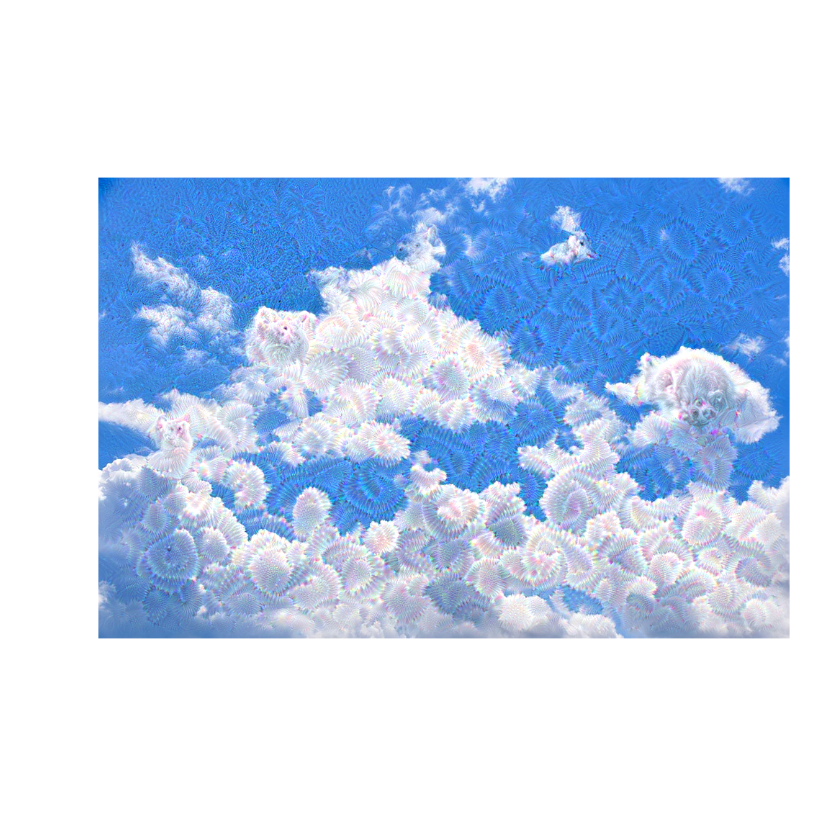

In [ ]:
library(raster)
img %>%
  as.array() %>%
  deprocess_image() %>%
  plot_image()

# **Aula 14 - Aplicações de AutoEncoders**

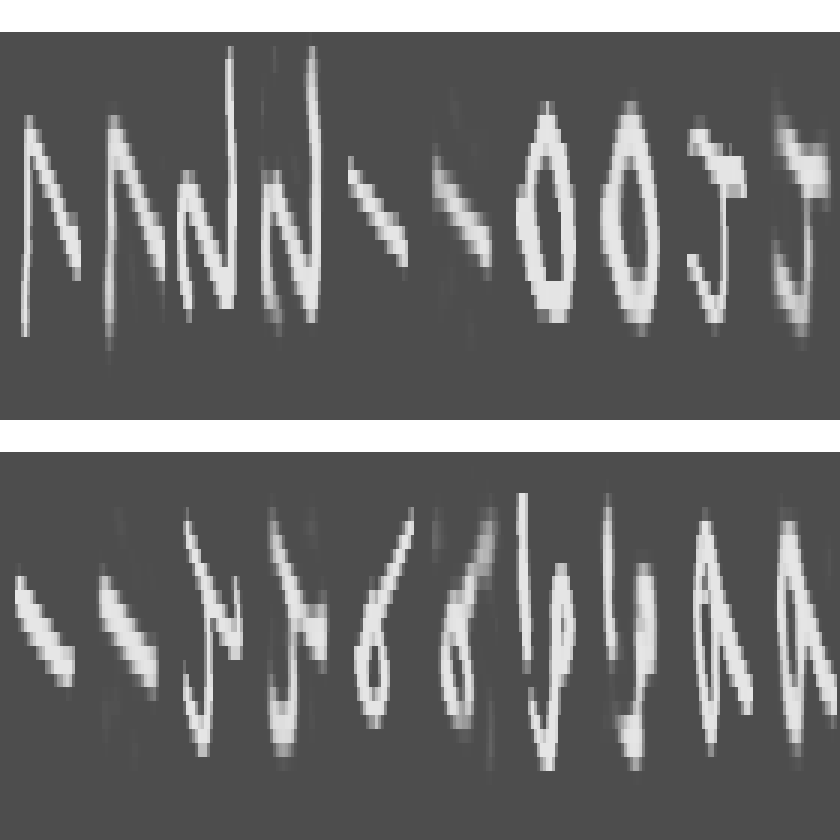

In [ ]:
# Install necessary packages if not already installed
if (!requireNamespace("keras", quietly = TRUE)) {
  install.packages("keras")
}

# Load necessary libraries
library(keras)

# Load the MNIST dataset
mnist <- dataset_mnist()
train_images <- mnist$train$x
test_images <- mnist$test$x

# Normalize the pixel values to range [0, 1]
train_images <- train_images / 255
test_images <- test_images / 255

# Flatten the images for the autoencoder
train_images_flat <- array_reshape(train_images, c(dim(train_images)[1], 784))
test_images_flat <- array_reshape(test_images, c(dim(test_images)[1], 784))

# Create a simple autoencoder model
create_autoencoder <- function(encoding_dim) {
  # Encoder
  input_layer <- layer_input(shape = c(784))
  encoded <- input_layer %>%
    layer_dense(units = encoding_dim, activation = "relu")

  # Decoder
  decoded <- encoded %>%
    layer_dense(units = 784, activation = "sigmoid")

  # Autoencoder
  autoencoder <- keras_model(inputs = input_layer, outputs = decoded)

  return(autoencoder)
}

# Set the dimensions of the autoencoder
encoding_dim <- 32  # Number of neurons in the middle (encoding) layer

# Create the autoencoder model
autoencoder <- create_autoencoder(encoding_dim)

# Compile the autoencoder model
autoencoder %>% compile(
  loss = "binary_crossentropy",
  optimizer = optimizer_adam()
)

# Train the autoencoder
autoencoder %>% fit(
  x = train_images_flat,
  y = train_images_flat,
  epochs = 50,
  batch_size = 256,
  shuffle = TRUE
)

# Use the trained autoencoder to encode and decode the test images
encoded_images <- autoencoder %>% predict(test_images_flat)

# Reshape the encoded images back to the original shape for visualization
decoded_images <- array_reshape(encoded_images, c(dim(encoded_images)[1], 28, 28))

# Display original and decoded images
par(mfrow = c(2, 10), mar = c(0, 0, 2, 0))
for (i in 1:10) {
  # Original images
  image(test_images[i, , ], col = grey.colors(256), axes = FALSE)

  # Decoded images
  image(decoded_images[i, , ], col = grey.colors(256), axes = FALSE)
}


# **Aula 16 - Aplicações de RNN**

In [ ]:
# Instale e carregue as bibliotecas necessárias
if (!requireNamespace("keras", quietly = TRUE)) {
  install.packages("keras")
}

library(keras)

# Carregue o conjunto de dados IMDb
imdb <- dataset_imdb(num_words = 10000)

# Divida o conjunto de dados em treinamento e teste
train_size <- 20000
test_size <- 5000

x_train <- imdb$train$x[1:train_size]
y_train <- imdb$train$y[1:train_size]

x_test <- imdb$train$x[(train_size + 1):(train_size + test_size)]
y_test <- imdb$train$y[(train_size + 1):(train_size + test_size)]

# Padronize as sequências para o mesmo comprimento
maxlen <- 100
x_train <- pad_sequences(x_train, maxlen = maxlen)
x_test <- pad_sequences(x_test, maxlen = maxlen)

# Crie o modelo da RNN
model <- keras_model_sequential()

model %>%
  layer_embedding(input_dim = 10000, output_dim = 32, input_length = maxlen) %>%
  layer_simple_rnn(units = 32) %>%
  layer_dense(units = 1, activation = "sigmoid")

# Compile o modelo
model %>% compile(
  optimizer = "adam",
  loss = "binary_crossentropy",
  metrics = c("accuracy")
)

# Treine o modelo
history <- model %>% fit(
  x_train,
  y_train,
  epochs = 10,
  batch_size = 128,
  validation_split = 0.2
)

# Avalie o modelo no conjunto de testes
metrics <- model %>% evaluate(x_test, y_test)
perda<-metrics[["loss"]]
acuracia<-metrics[["accuracy"]]
cat("Acurácia no conjunto de testes:", acuracia, "\n")
cat("O resultado da função de perda no conjunto de testes:", perda, "\n")

Acurácia no conjunto de testes: 0.8106 
O resultado da função de perda no conjunto de testes: 0.7358719 
